## Treinando um modelo pra detecção de rachaduras em concreto


### Aquisição dos dados

In [1]:
!curl https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/5y9wdsg2zt-2.zip --output imagens.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  229M  100  229M    0     0  29.5M      0  0:00:07  0:00:07 --:--:-- 34.4M


In [2]:
import zipfile
with zipfile.ZipFile('imagens.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [3]:
!unrar x '/content/Concrete Crack Images for Classification.rar'

A saída de streaming foi truncada nas últimas 5000 linhas.
Extracting  Negative/15002.jpg                                            88%  OK 
Extracting  Negative/15003.jpg                                            88%  OK 
Extracting  Negative/15004.jpg                                            88%  OK 
Extracting  Negative/15005.jpg                                            88%  OK 
Extracting  Negative/15006.jpg                                            88%  OK 
Extracting  Negative/15007.jpg                                            88%  OK 
Extracting  Negative/15008.jpg                                            88%  OK 
Extracting  Negative/15009.jpg                                            88%  OK 
Extracting  Negative/15010.jpg                                            88%  OK 
Extracting  Negative/15011.jpg                                            88%  OK 
Extracting  Negative/

In [ ]:
!ls

'Concrete Crack Images for Classification.rar'	 imagens.zip   Positive
 drive						 Negative      sample_data


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from glob import glob
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

## Preparando imagens para treinamento


Limitando em 10000 imagens para cada classe

In [ ]:
# lista de imagens nos diretorios
lista_imagens_r = glob('/content/Positive/*.jpg')
lista_imagens_n = glob('/content/Negative/*.jpg')

# cria lista com arrays de imagem
X = []
Y = []
for im in lista_imagens_r[:1200]:
    im_array = plt.imread(im)
    X.append(im_array/255.)
    Y.append(1)

#cria lista com labels
for im in lista_imagens_n[:1200]:
    im_array = plt.imread(im)
    X.append(im_array/255.)
    Y.append(0)

# transforma em array (n, M, N, k)
X = np.array(X)
Y = np.array(Y)

# divisao em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test, X_val, Y_test, Y_val  = train_test_split(X_test, Y_test, test_size=0.4, random_state=42)

In [ ]:
print(f'shape dados de treino: \n entrada: {X_train.shape}     saida: {Y_train.shape} \n\nshape dados de teste \n entrada: {X_test.shape}      saida: {Y_test.shape}')

shape dados de treino: 
 entrada: (1680, 227, 227, 3)     saida: (1680,) 

shape dados de teste 
 entrada: (432, 227, 227, 3)      saida: (432,)


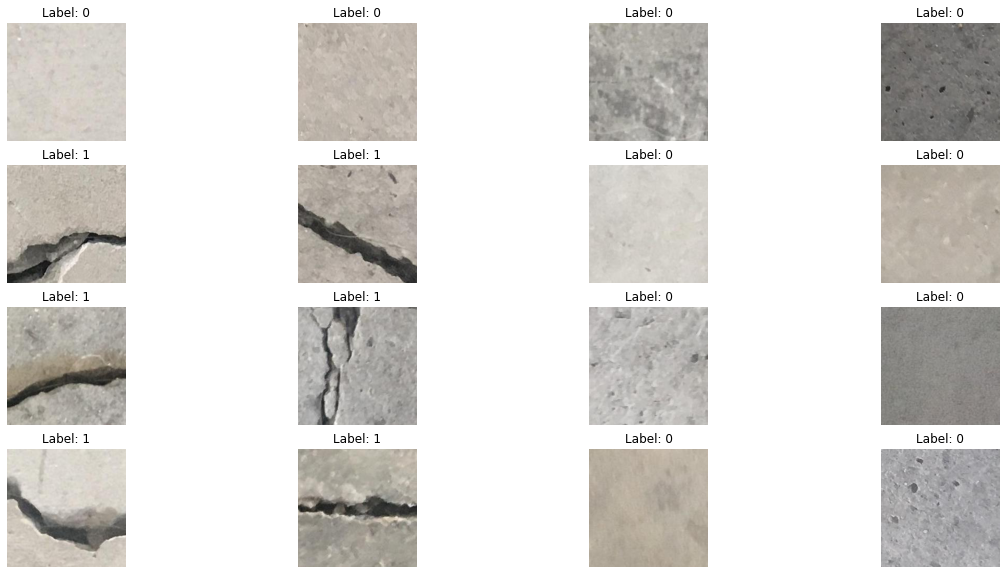

In [ ]:
fig, ax = plt.subplots(4, 4, figsize=(20,10))
ax = ax.ravel()
for axis in ax:
  ind = np.random.randint(low=0, high= X_train.shape[0])
  axis.imshow(X_train[ind, ...])
  axis.set_title(f'Label: {Y_train[ind]}')
  axis.axis('off')

In [ ]:
## Sequential API
#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Input())
#model.add(tf.keras.layers.Conv2D())
#model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense())
#model.add(tf.keras.layers.Dense())
#model.compile(optimizer='adam', loss='binary_crossentropy')
# This builds the model for the first time:
#model.fit(x, y, batch_size=32, epochs=10)


## Functional API
i = Input(shape=(227, 227, 3))
x = Conv2D(16, (5, 5), strides=2, activation='relu')(i)
x = Conv2D(32, (5, 5), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(inputs=i, outputs=x)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 112, 112, 16)      1216      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 54, 54, 32)        12832     
_________________________________________________________________
flatten (Flatten)            (None, 93312)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              95552512  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1025      
Total params: 95,567,585
Trainable params: 95,567,585
Non-trainable params: 0
_________________________________________________

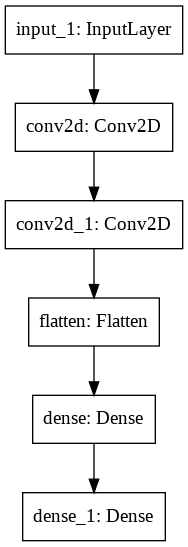

In [ ]:
plot_model(model)

In [ ]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
model.fit(x=X_train, y=Y_train, epochs=10, batch_size=32, validation_data=(X_val, Y_val), validation_batch_size=32)

Epoch 1/10
53/53 [==============================] - 36s 55ms/step - loss: 2.5092 - accuracy: 0.6317 - val_loss: 0.2055 - val_accuracy: 0.9653
Epoch 2/10
53/53 [==============================] - 2s 41ms/step - loss: 0.5117 - accuracy: 0.7692 - val_loss: 0.1593 - val_accuracy: 0.9618
Epoch 3/10
53/53 [==============================] - 2s 41ms/step - loss: 0.2300 - accuracy: 0.9290 - val_loss: 0.1017 - val_accuracy: 0.9653
Epoch 4/10
53/53 [==============================] - 2s 42ms/step - loss: 0.1201 - accuracy: 0.9640 - val_loss: 0.1407 - val_accuracy: 0.9653
Epoch 5/10
53/53 [==============================] - 2s 42ms/step - loss: 0.1447 - accuracy: 0.9566 - val_loss: 0.5193 - val_accuracy: 0.9306
Epoch 6/10
53/53 [==============================] - 2s 42ms/step - loss: 0.3717 - accuracy: 0.9420 - val_loss: 0.1724 - val_accuracy: 0.9896
Epoch 7/10
53/53 [==============================] - 2s 42ms/step - loss: 0.1329 - accuracy: 0.9901 - val_loss: 0.0699 - val_accuracy: 0.9931
Epoch 8/10
5

In [ ]:
metrics = model.history.history

In [ ]:
type(metrics)

dict

In [ ]:
metrics.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

(0.0, 1.1)

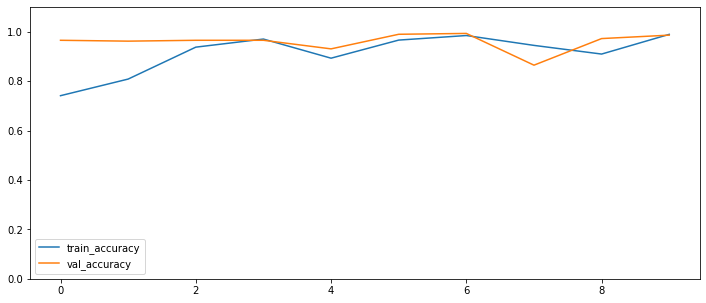

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.plot(metrics['accuracy'], label='train_accuracy')
ax.plot(metrics['val_accuracy'], label='val_accuracy')
ax.legend()
ax.set_ylim([0, 1.1])


## Avaliando modelo nos dados de teste

In [ ]:
model.evaluate(X_test, Y_test)

14/14 [==============================] - 0s 15ms/step - loss: 0.0756 - accuracy: 0.9769


[0.07557519525289536, 0.9768518805503845]

## Resultado do modelo nos dados de teste

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred.ravel()

array([0.01743752, 1.        , 1.        , 0.01743752, 1.        ,
       0.01743752, 0.99064225, 0.01743752, 0.01743752, 1.        ,
       0.01745009, 0.01795674, 1.        , 0.01743752, 0.01744298,
       1.        , 0.01743752, 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.03010196, 0.01809527, 0.01743752,
       1.        , 0.01743752, 1.        , 0.01743752, 0.01743752,
       1.        , 1.        , 0.9997135 , 0.6035241 , 0.995544  ,
       0.01743752, 1.        , 0.01743752, 0.01743752, 1.        ,
       0.0176746 , 0.03170783, 0.99999154, 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.01785151, 1.        ,
       0.01743752, 1.        , 0.01743752, 0.01743752, 0.01764781,
       0.01743752, 0.01789548, 1.        , 0.01743752, 0.01829612,
       0.01743752, 1.        , 0.01750595, 0.01758769, 0.01752888,
       0.9999943 , 1.        , 1.        , 1.        , 0.01964075,
       0.01743752, 1.        , 1.        , 1.        , 1.     

In [ ]:
print(f'Dados de teste:\nNumero de imagens com rachadura : {sum(Y_test==1)}\nNumero de imagens sem rachadura : {sum(Y_test==0)}')

Dados de teste:
Numero de imagens com rachadura : 231
Numero de imagens sem rachadura : 201


Text(69.0, 0.5, 'Predict labels')

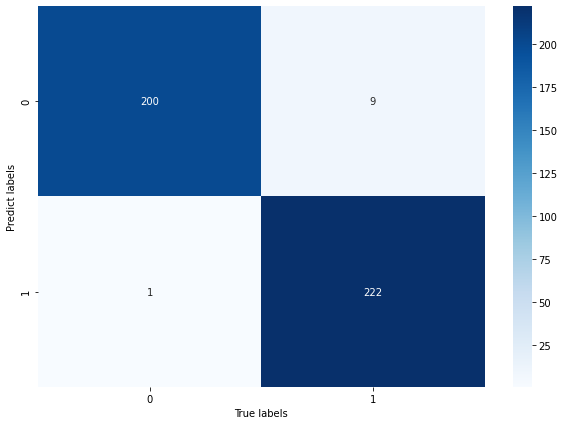

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(1*(y_pred>0.5), Y_test), annot=True, fmt='g', cmap='Blues')

plt.xlabel('True labels')
plt.ylabel('Predict labels')

## Verificando algumas imagens 

### Preditos como 1 e rotulados como 0

In [ ]:
falsos_positivos = X_test[(((1*(y_pred>0.5)).ravel() == 1) & (Y_test == 0)), ...]
falsos_positivos.shape

(1, 227, 227, 3)

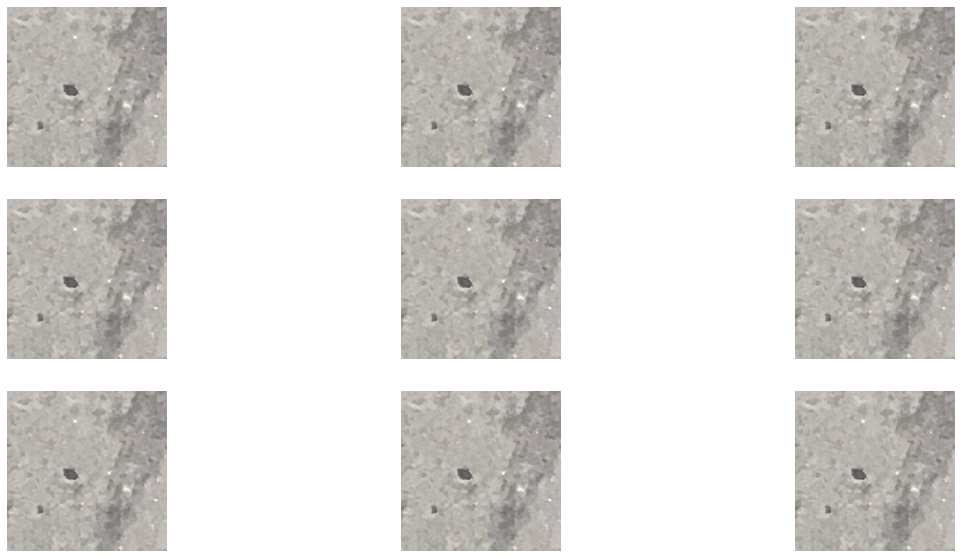

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(20,10))
ax = ax.ravel()
for axis in ax:
  ind = np.random.randint(low=0, high= falsos_positivos.shape[0])
  axis.imshow(falsos_positivos[ind, ...])
  axis.axis('off')

### Preditos como 0 e rotulados como 1

In [ ]:
falsos_negativos = X_test[(((1*(y_pred>0.5)).ravel() == 0) & (Y_test == 1)), ...]
falsos_negativos.shape

(9, 227, 227, 3)

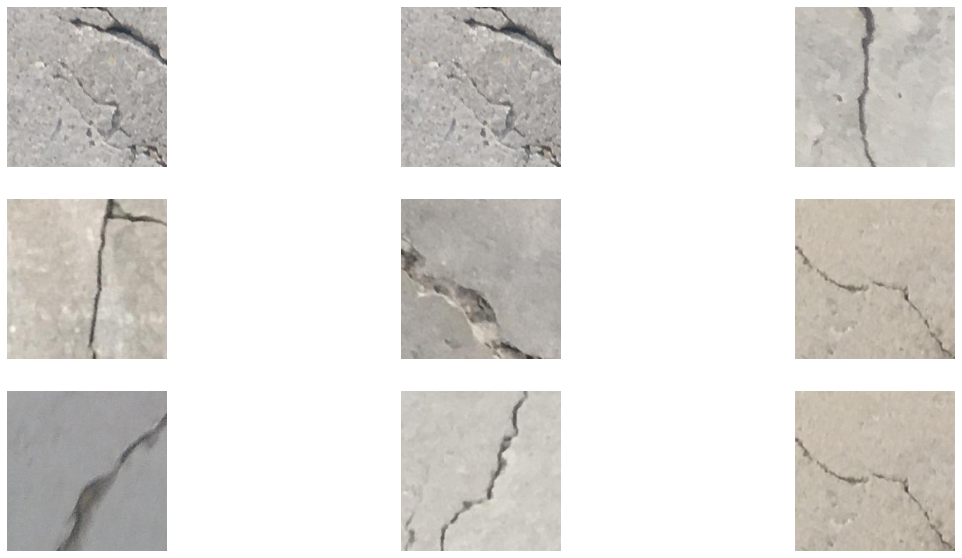

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(20,10))
ax = ax.ravel()
for axis in ax:
  ind = np.random.randint(low=0, high= falsos_negativos.shape[0])
  axis.imshow(falsos_negativos[ind, ...])
  axis.axis('off')

### Preditos como 1 e rotulados como 1

In [ ]:
verdadeiros_positivos = X_test[(((1*(y_pred>0.5)).ravel() == 1) & (Y_test == 1)), ...]
verdadeiros_positivos.shape

(222, 227, 227, 3)

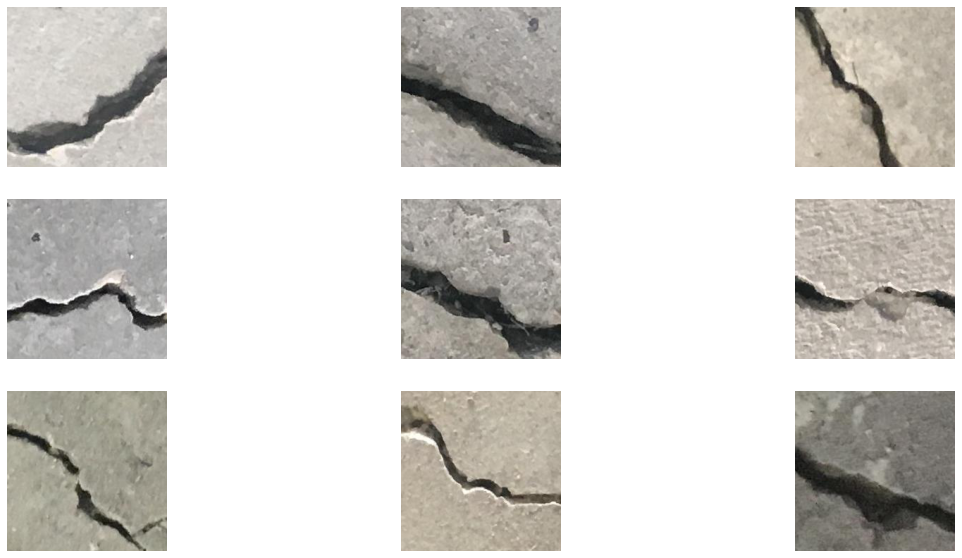

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(20,10))
ax = ax.ravel()
for axis in ax:
  ind = np.random.randint(low=0, high= verdadeiros_positivos.shape[0])
  axis.imshow(verdadeiros_positivos[ind, ...])
  axis.axis('off')

### Preditos como 0 e rotulados como 0

In [ ]:
verdadeiros_negativos = X_test[(((1*(y_pred>0.5)).ravel() == 0) & (Y_test == 0)), ...]

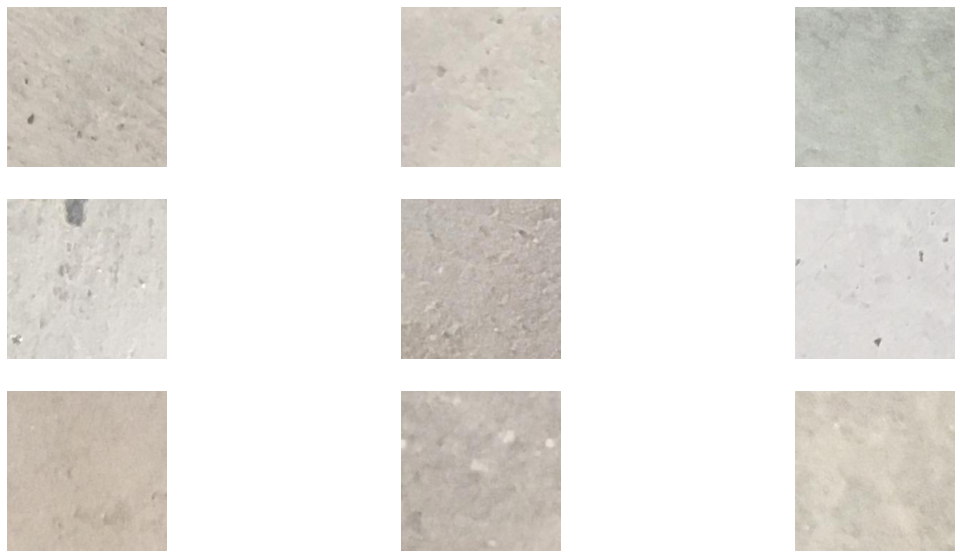

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(20,10))
ax = ax.ravel()
for axis in ax:
  ind = np.random.randint(low=0, high= verdadeiros_negativos.shape[0])
  axis.imshow(verdadeiros_negativos[ind, ...])
  axis.axis('off')

## Treinamento utilizando tf.datasets

In [5]:
# lista de imagens nos diretorios
lista_imagens_r = glob('/content/Positive/*.jpg')
lista_imagens_n = glob('/content/Negative/*.jpg')
image_dataframe = pd.DataFrame({'filename':lista_imagens_n+lista_imagens_r})

In [6]:
image_dataframe['class'] = image_dataframe['filename'].apply(lambda x: 'N' if 'Negative' in x else 'S')

In [7]:
image_dataframe

,filename,class
0,/content/Negative/11538.jpg,N
1,/content/Negative/16200.jpg,N
2,/content/Negative/04563.jpg,N
3,/content/Negative/06193.jpg,N
4,/content/Negative/06060.jpg,N
...,...,...
39995,/content/Positive/07551.jpg,S
39996,/content/Positive/00301.jpg,S
39997,/content/Positive/06974.jpg,S
39998,/content/Positive/05374.jpg,S


In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_df, test_df = train_test_split(image_dataframe, test_size=0.3, random_state=42)
test_df, val_df  = train_test_split(test_df, test_size=0.4, random_state=42)

In [10]:
train_generator = train_datagen.flow_from_dataframe(train_df, target_size=(227, 227), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_dataframe(test_df, target_size=(227, 227), batch_size=1, class_mode='binary')
val_generator = val_datagen.flow_from_dataframe(val_df, target_size=(227, 227), batch_size=8, class_mode='binary')

Found 28000 validated image filenames belonging to 2 classes.
Found 7200 validated image filenames belonging to 2 classes.
Found 4800 validated image filenames belonging to 2 classes.


In [11]:
i = Input(shape=(227, 227, 3))
x = Conv2D(16, (5, 5), strides=2, activation='relu')(i)
x = Conv2D(32, (5, 5), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(inputs=i, outputs=x)

In [12]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
model.fit(train_generator, epochs=10, validation_data=val_generator, validation_steps=10)

Epoch 1/10
875/875 [==============================] - 88s 64ms/step - loss: 0.9192 - accuracy: 0.6013 - val_loss: 0.6687 - val_accuracy: 0.4500
Epoch 2/10
875/875 [==============================] - 55s 63ms/step - loss: 0.7230 - accuracy: 0.5113 - val_loss: 0.6938 - val_accuracy: 0.4875
Epoch 3/10
875/875 [==============================] - 55s 63ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6921 - val_accuracy: 0.5250
Epoch 4/10
875/875 [==============================] - 56s 64ms/step - loss: 0.4513 - accuracy: 0.7330 - val_loss: 0.2123 - val_accuracy: 0.9125
Epoch 5/10
875/875 [==============================] - 56s 64ms/step - loss: 0.0614 - accuracy: 0.9804 - val_loss: 0.0493 - val_accuracy: 0.9750
Epoch 6/10
875/875 [==============================] - 56s 64ms/step - loss: 0.0497 - accuracy: 0.9868 - val_loss: 0.0424 - val_accuracy: 0.9625
Epoch 7/10
875/875 [==============================] - 55s 63ms/step - loss: 0.0460 - accuracy: 0.9859 - val_loss: 0.0189 - val_accuracy:

(0.0, 1.1)

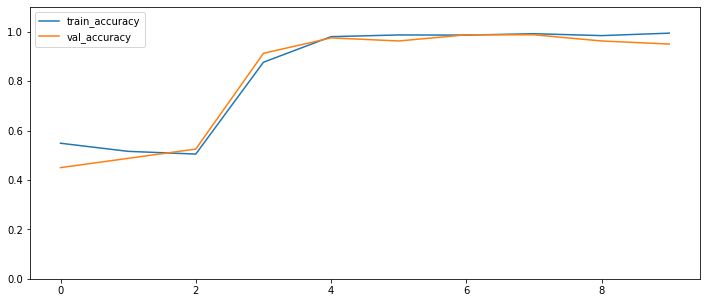

In [14]:
metrics = model.history.history
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.plot(metrics['accuracy'], label='train_accuracy')
ax.plot(metrics['val_accuracy'], label='val_accuracy')
ax.legend()
ax.set_ylim([0, 1.1])

In [15]:
model.evaluate(test_generator)

7200/7200 [==============================] - 29s 4ms/step - loss: 0.1927 - accuracy: 0.9568


[0.19274118542671204, 0.9568055272102356]

## Fazendo export do modelo

In [21]:
from typing import Callable, Tuple
## used when tf >= 2.0
tf.compat.v1.disable_eager_execution()
from tensorflow import keras


class ServingInputReceiver:
    """
    A callable object that returns a
    `tf.estimator.export.ServingInputReceiver`
    object that provides a method to convert
    `image_bytes` input to model.input
    """

    def __init__(
            self, img_size: Tuple[int],
            preprocess_fn: Callable = None,
            input_name: str = "input_1"):
        self.img_size = img_size
        self.preprocess_fn = preprocess_fn
        self.input_name = input_name

    def decode_img_bytes(self, img_b64: str) -> tf.Tensor:
        """
        Decodes a base64 encoded bytes and converts it to a Tensor.
        Args:
            img_bytes (str): base64 encoded bytes of an image file
        Returns:
            img (Tensor): a tensor of shape (width, height, 3)
        """
        img = tf.io.decode_image(
            img_b64,
            channels=3,
            dtype=tf.uint8,
            expand_animations=False
        )
        img = tf.image.resize(img, size=self.img_size)
        img = tf.ensure_shape(img, (*self.img_size, 3))
        img = tf.cast(img, tf.float32)/255
        return img

    def __call__(self) -> tf.estimator.export.ServingInputReceiver:
        # a placeholder for a batch of base64 string encoded of image bytes
        img_b64 = tf.compat.v1.placeholder(
            shape=(None,),
            dtype=tf.string,
            name="image_bytes")

        # apply self.decode_img_bytes() to a batch of image bytes (imgs_b64)
        img = tf.map_fn(
            self.decode_img_bytes,
            img_b64,
            dtype=tf.float32)

        # apply preprocess_fn if applicable
        if self.preprocess_fn:
            img = self.preprocess_fn(img)
          

        return tf.estimator.export.ServingInputReceiver(
            features={self.input_name: img},
            receiver_tensors={
                "image_bytes": img_b64,
            }
        )

In [22]:
serving_input_receiver = ServingInputReceiver(img_size=(227, 227), input_name="input_1")
estimator_save_dir = "estimators/crack_detect"
estimator = tf.keras.estimator.model_to_estimator(
    keras_model=model,
    model_dir=estimator_save_dir)


export_model_dir = "models/crack_detect/"

estimator.export_saved_model(
    export_dir_base=export_model_dir,
    serving_input_receiver_fn=serving_input_receiver)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using the Keras model provided.
INFO:tensorflow:Using config: {'_model_dir': 'estimators/crack_detect', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling mo

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:434: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


INFO:tensorflow:Assets added to graph.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: models/crack_detect/temp-1620250136/saved_model.pb


b'models/crack_detect/1620250136'

In [24]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [26]:
!cp -r models gdrive/MyDrive/